### Visualization of ampliseq results

In [185]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

from matplotlib import patches as mpatches

from scipy.spatial import distance
from scipy.cluster.hierarchy import dendrogram, linkage

In [136]:
df = pd.read_csv("../data/ampliseq/ampliseq_results/qiime2/rel_abundance_tables/rel-table-4.tsv", sep="\t", skiprows=1)
df_raw = df.copy()

### Stacked barplot of relative abundance

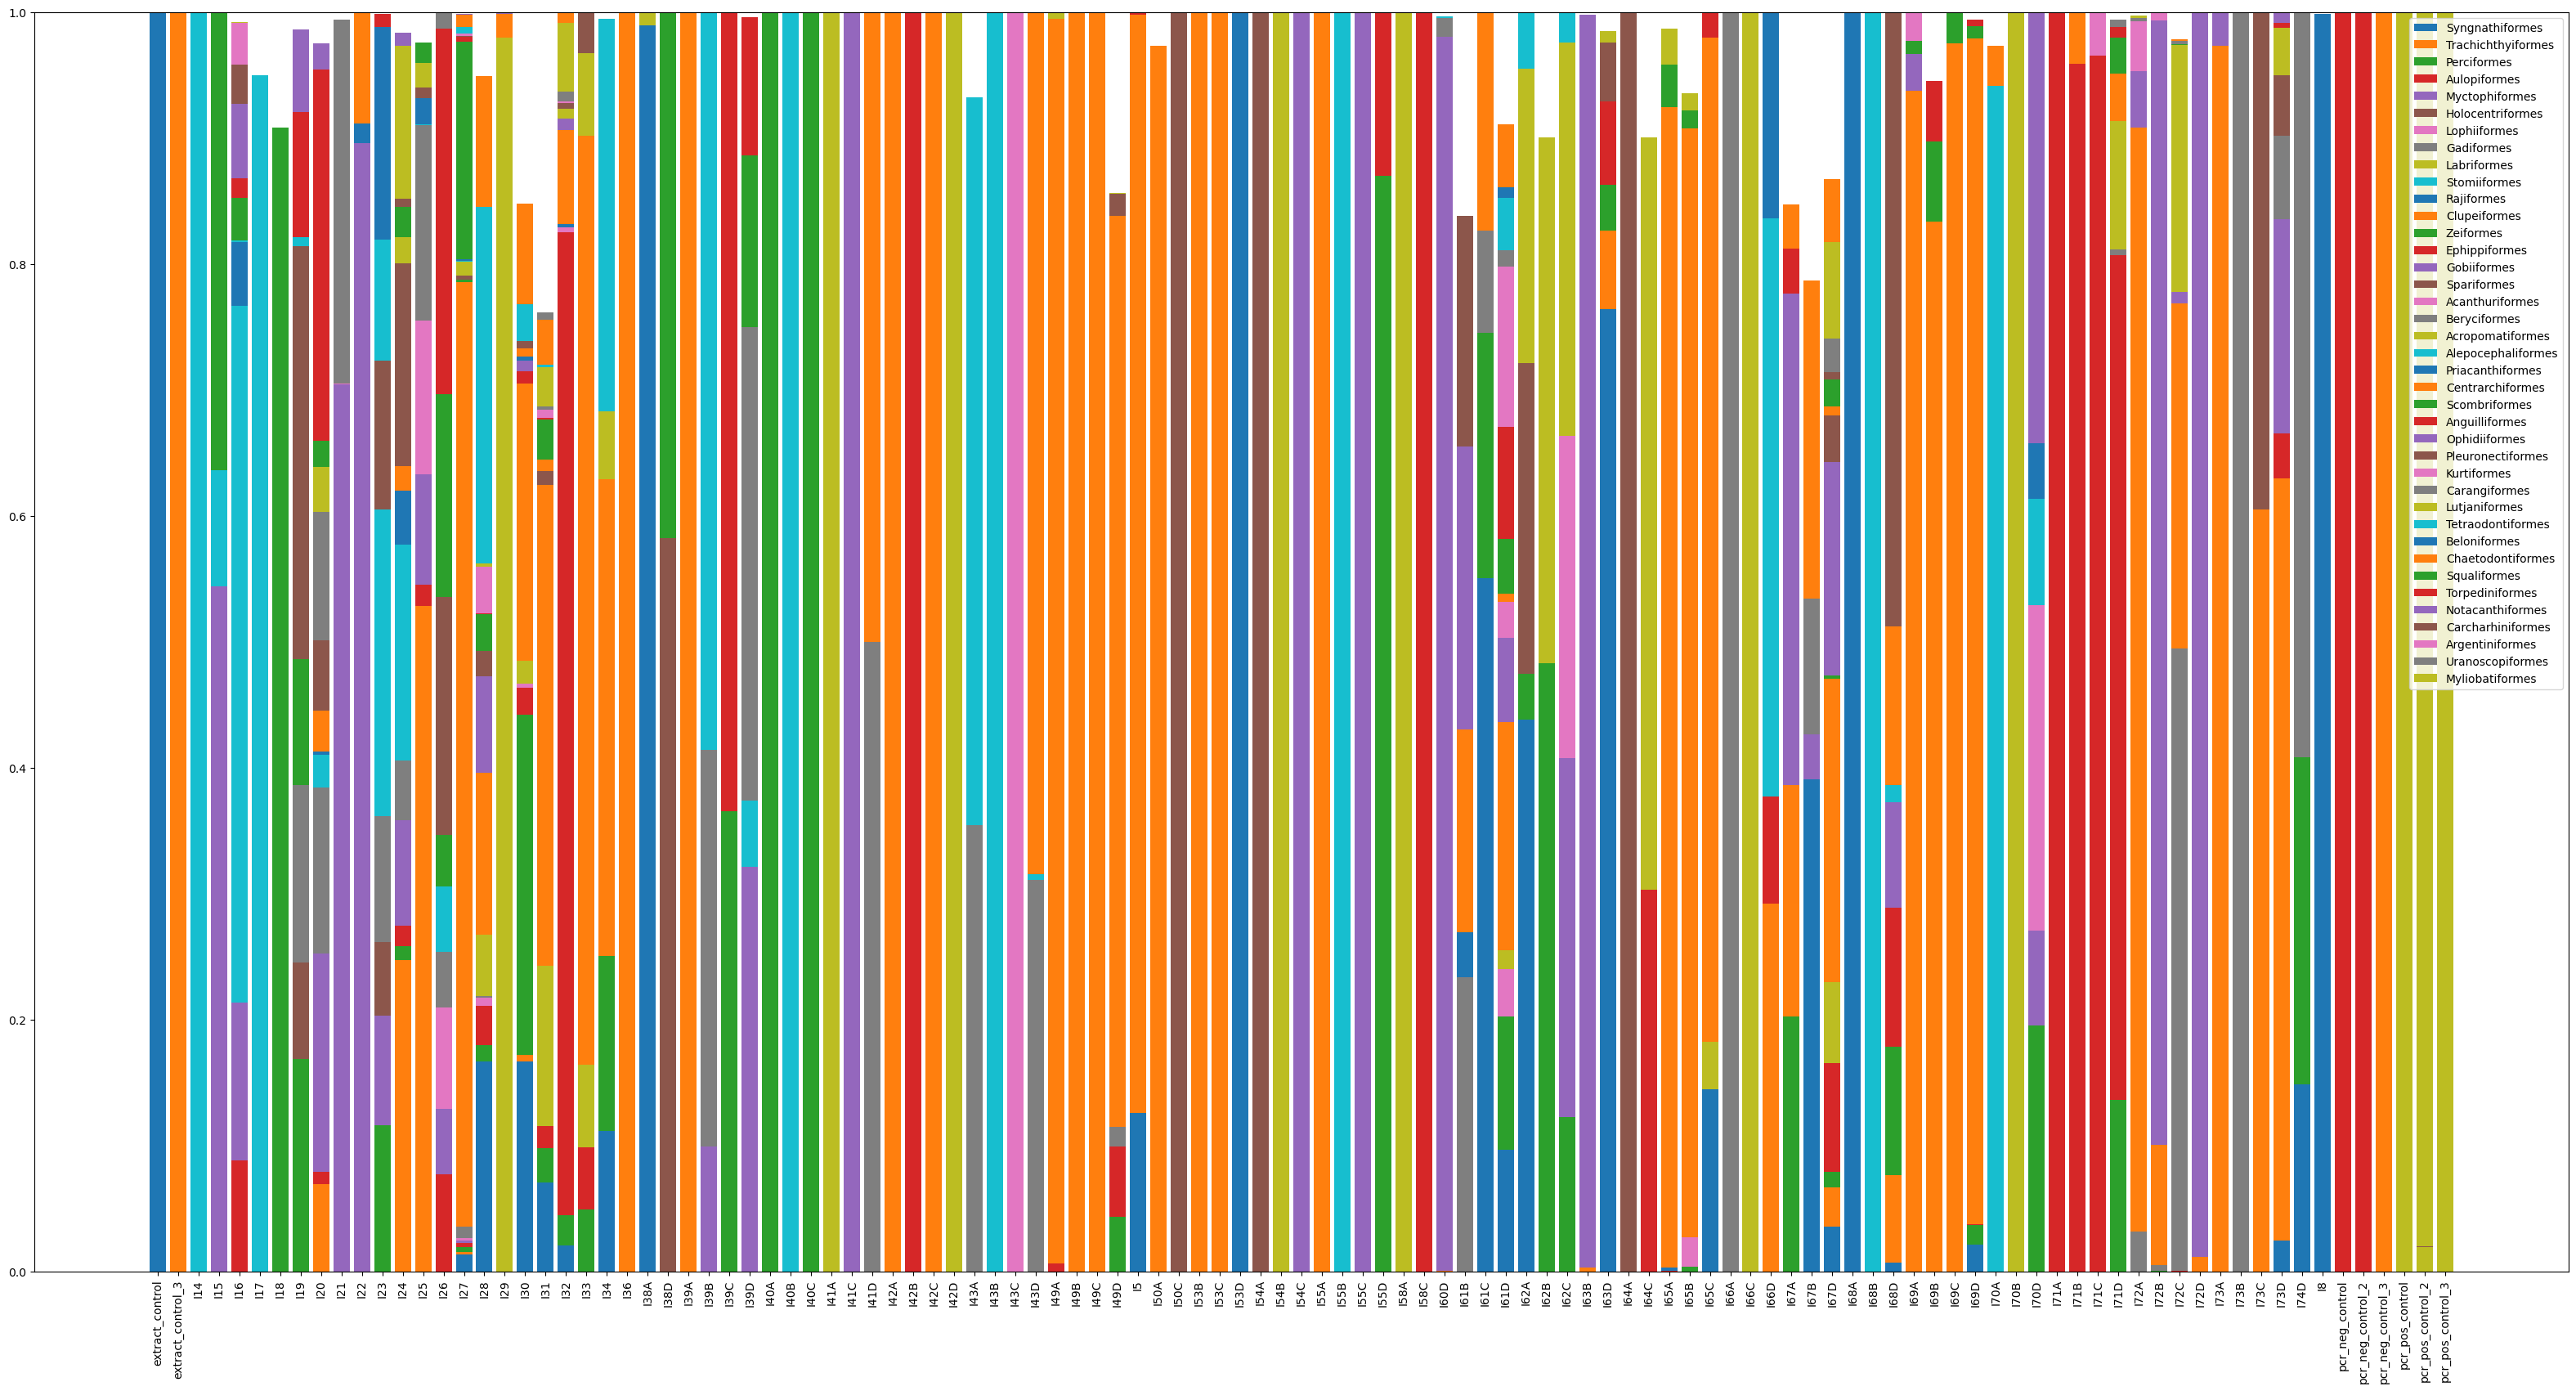

In [137]:
# Filter rows that don't have up to level 4
df = df[df["#OTU ID"].str.split(";", expand=True).apply(lambda row: all(row != ''), axis=1)]
df["#OTU ID"] = df["#OTU ID"].str.split(";").apply(lambda l: l[-1])
df = df.set_index("#OTU ID")

# Keep samples with at least 75% identified
df_ = (df.sum() > 0.75)
plot_df = df[df_.index[df_]]

# Code below is from https://python-charts.com/part-whole/stacked-bar-chart-matplotlib/
groups = plot_df.columns
values = plot_df.values
fig, ax = plt.subplots(figsize=(40,20))

# Stacked bar chart with loop
for i in range(values.shape[0]):
    ax.bar(groups, values[i], bottom = np.sum(values[:i], axis = 0), label=plot_df.index[i])
    
_ = ax.legend()

_ = plt.xticks(rotation=90)

plt.savefig("../plots/stacked_barplot_draft_remove_unid.png", dpi=300, bbox_inches="tight")

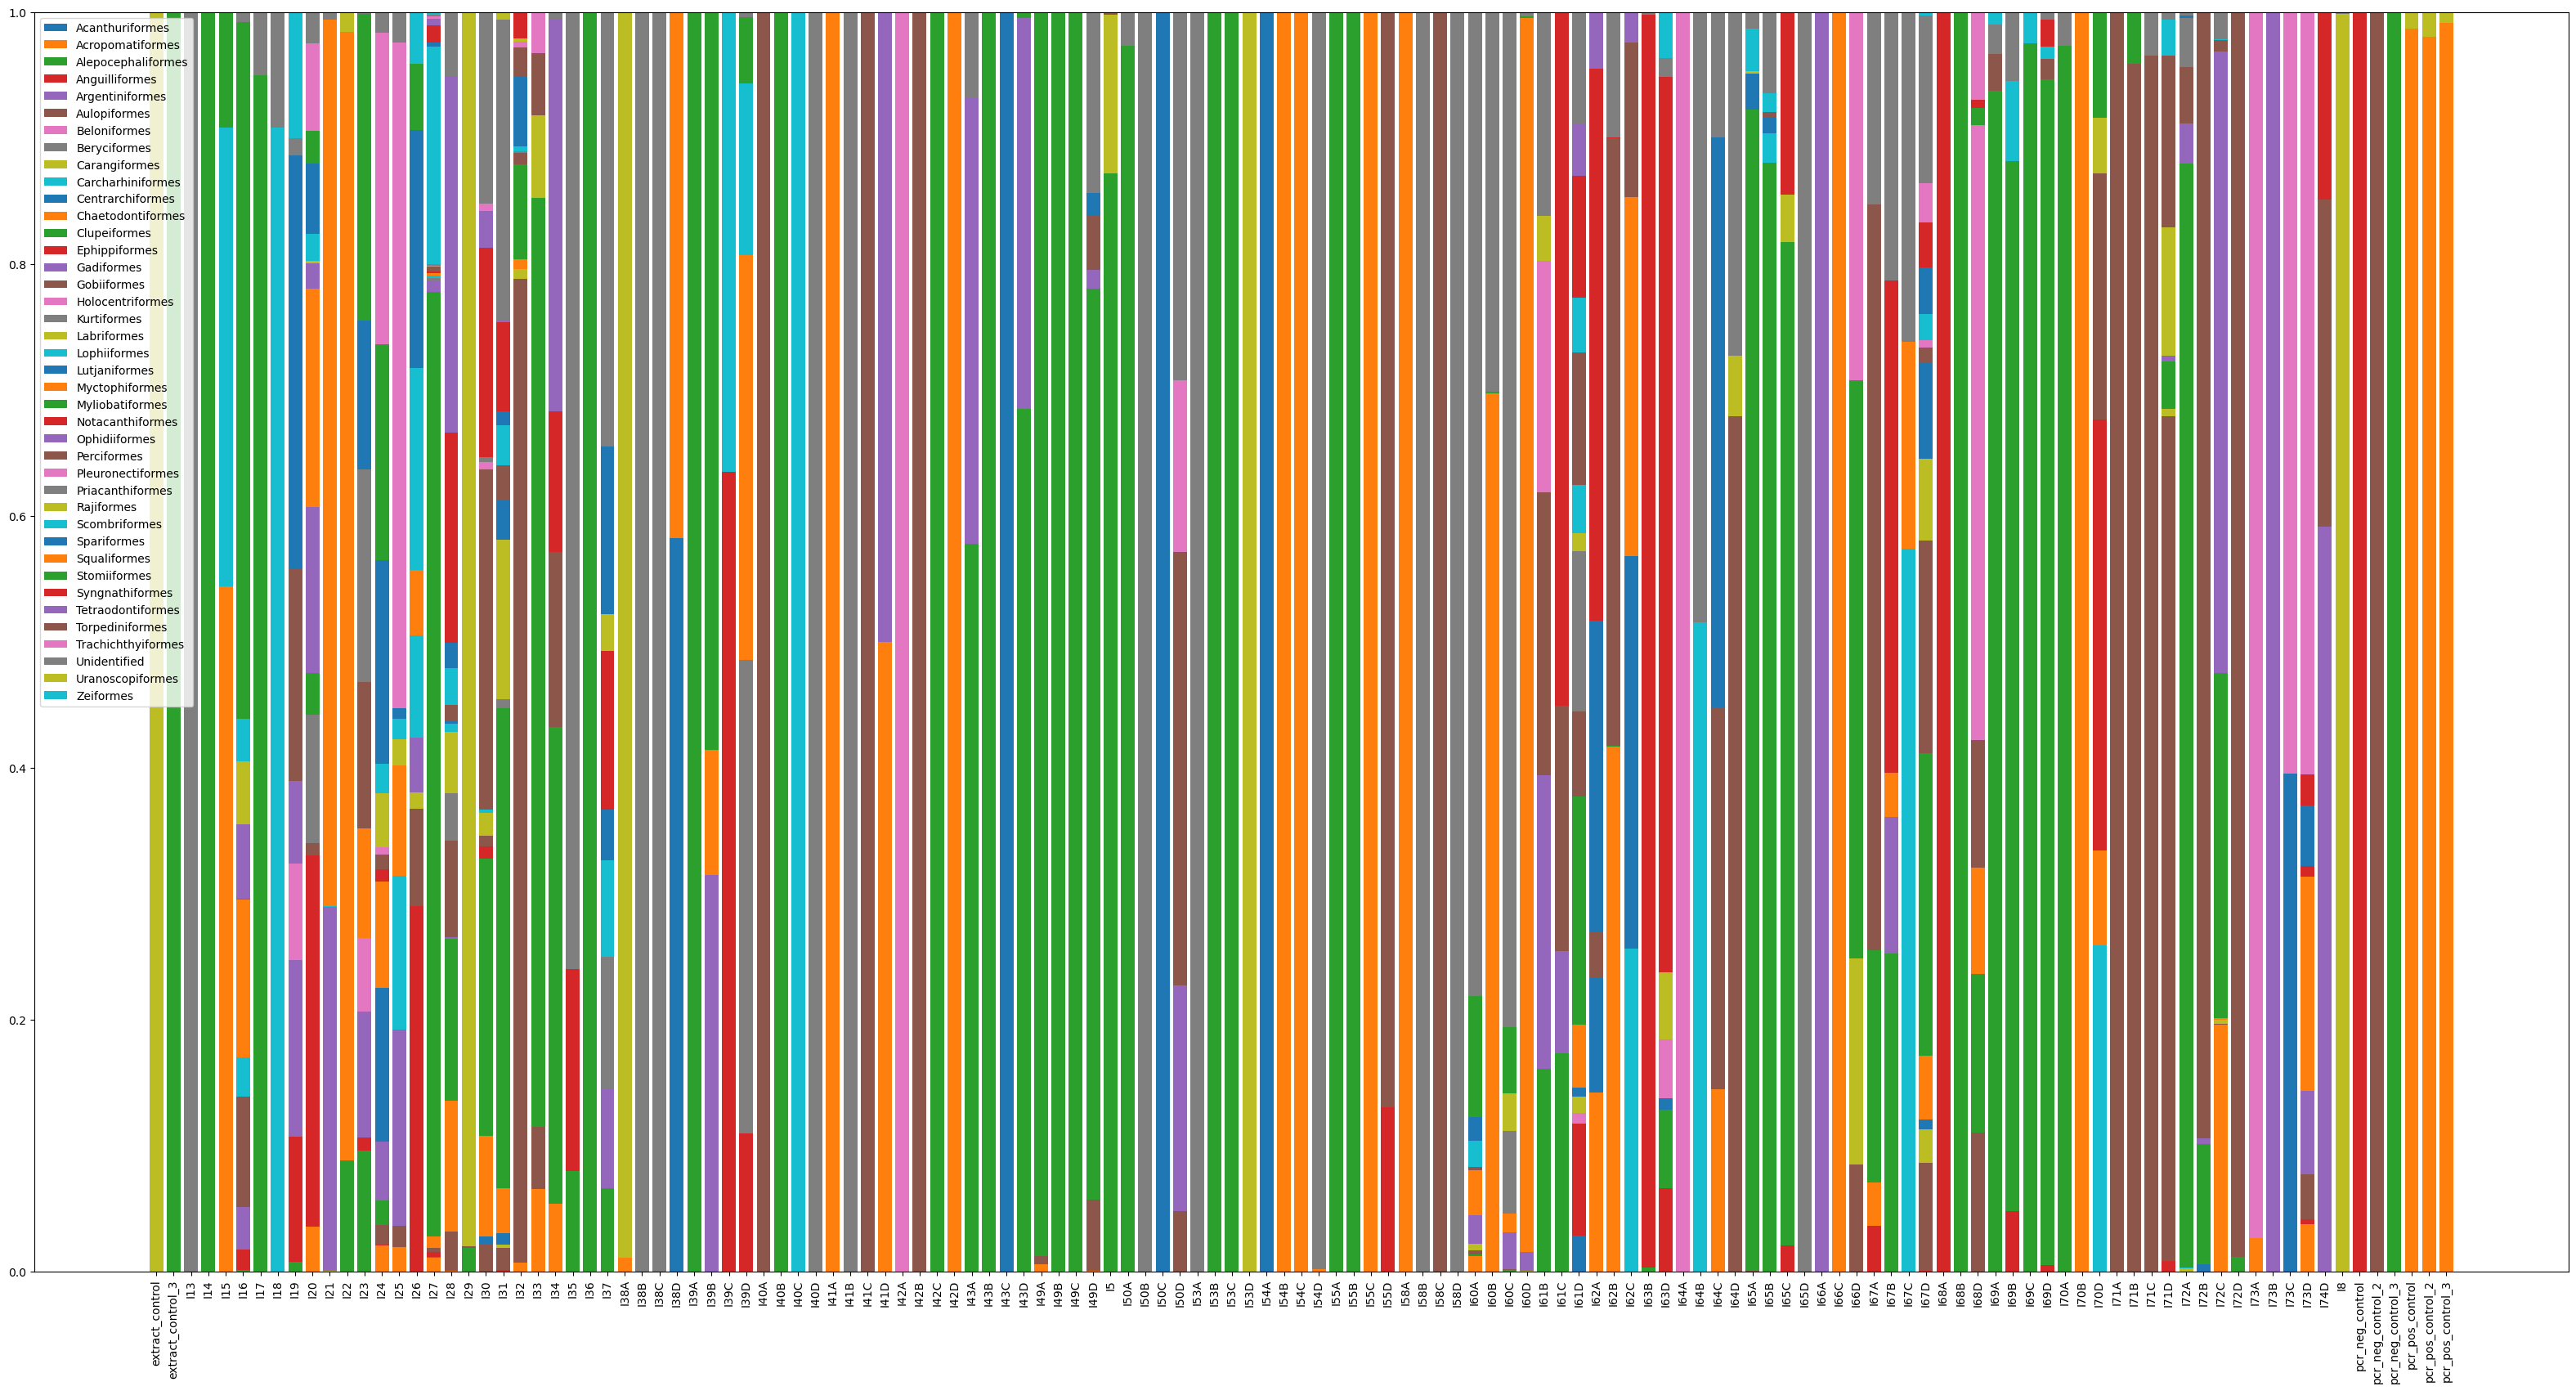

In [150]:
# Filter rows that don't have up to level 4
df = df_raw.copy()
# df = df[df["#OTU ID"].str.split(";", expand=True).apply(lambda row: all(row != ''), axis=1)]
df["#OTU ID"] = df["#OTU ID"].str.split(";").apply(lambda l: l[-1])
df["#OTU ID"] = df["#OTU ID"].apply(lambda s: "Unidentified" if not s else s)
df = df.groupby("#OTU ID").sum()
# df = df.set_index("#OTU ID")

# Keep samples with at least 75% identified
df_ = (df.sum() > 0.75)
plot_df = df[df_.index[df_]]

# Code below is from https://python-charts.com/part-whole/stacked-bar-chart-matplotlib/
groups = plot_df.columns
values = plot_df.values
fig, ax = plt.subplots(figsize=(40,20))

# Stacked bar chart with loop
for i in range(values.shape[0]):
    ax.bar(groups, values[i], bottom = np.sum(values[:i], axis = 0), label=plot_df.index[i])
    
_ = ax.legend()

_ = plt.xticks(rotation=90)

plt.savefig("../plots/stacked_barplot_draft.png", dpi=300, bbox_inches="tight")

In [201]:
# Don't use controls for this
samples = [i for i in df.columns if len(i) < 6]

# Calculate distance matrix
X = distance.pdist(df[samples].T.values, metric="braycurtis")

# Convert to squareform
dist = distance.squareform(X)

# Similarity matrix
sim = abs(dist - 1)

# Convert to dataframe
dist = pd.DataFrame(dist, index=samples, columns=samples)

# Perform hierarchical clustering with UPGMA
Z = linkage(X, method="average")

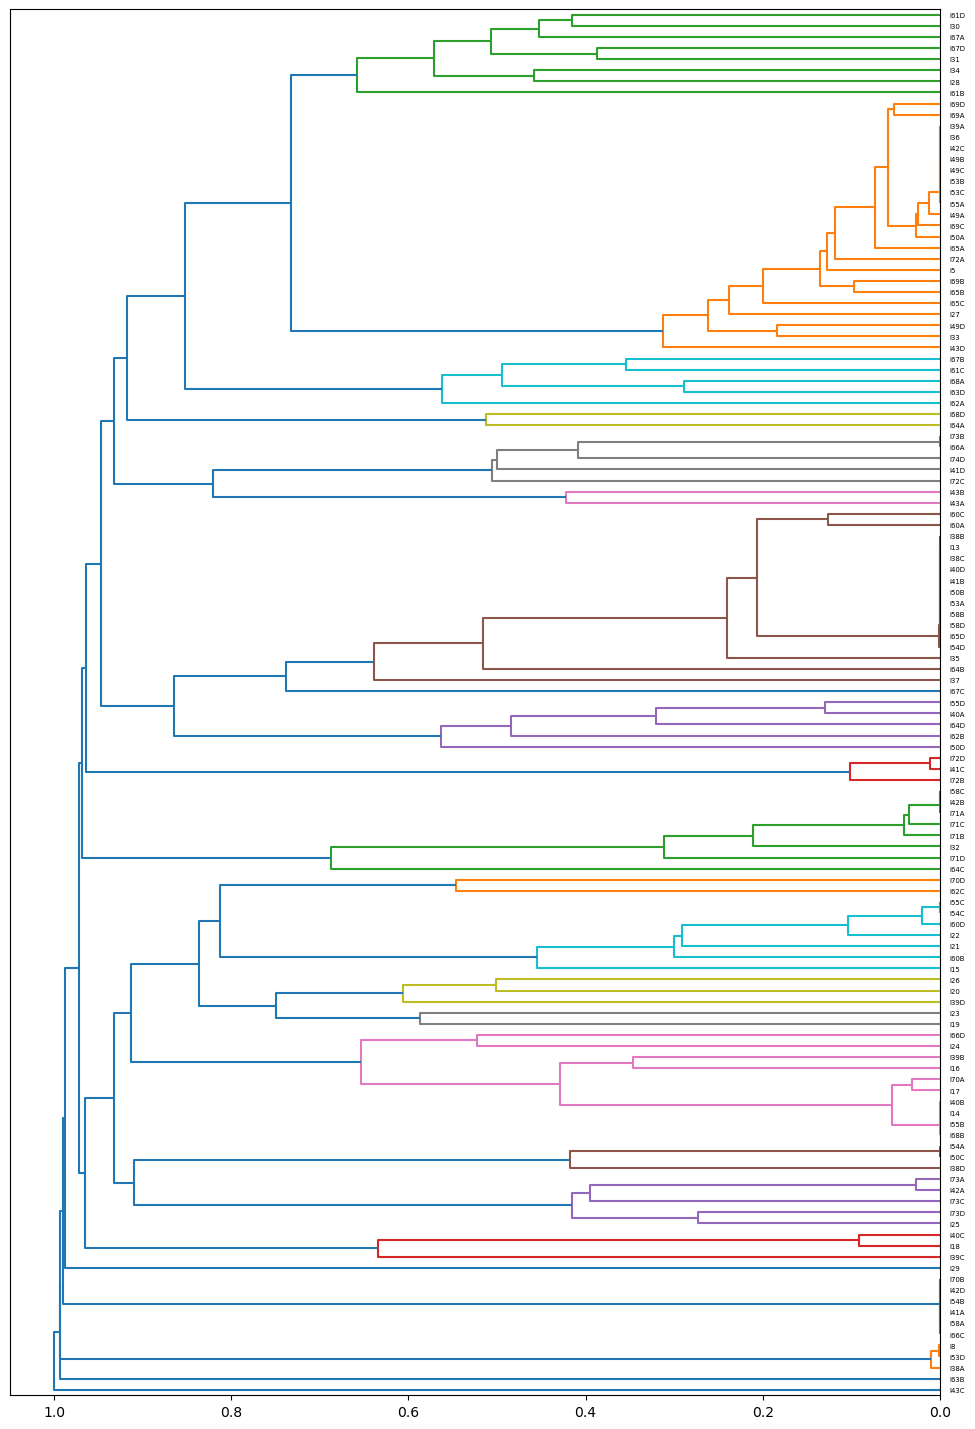

In [204]:
fig, ax = plt.subplots(figsize=(12,18))

# Plot dendrogram
p = dendrogram(Z, orientation="left", labels=samples)

plt.savefig("../plots/dendrogram_bc_average_draft.png", dpi=300, bbox_inches="tight")